In [6]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train = True, download = True, transform = 
                       transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True, transform = 
                       transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X= torch.rand((28,28))
X = X.view(-1,28*28)

In [19]:
output = net(X)

In [20]:
output

tensor([[-2.3689, -2.2738, -2.2936, -2.2689, -2.2230, -2.3327, -2.2632, -2.3365,
         -2.3976, -2.2806]], grad_fn=<LogSoftmaxBackward0>)

In [23]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) 

EPOCHS = 3

for epoch in range (EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0349, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)


In [24]:
correct = 0
total = 0

with torch.no_grad():
    #net.train()     ....net.eval()
    for data in trainset:
        X,y= data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


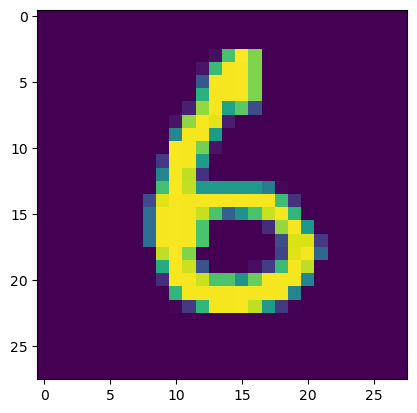

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()


In [35]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(6)
